In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
df = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
print(df.shape)
print(df.country.unique(), df.country.nunique())

(27820, 12)
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Sloven

In [4]:
df.rename(columns={'suicides/100k pop': 'suicides_per_100k_pop',
                  ' gdp_for_year ($) ': 'gdp_for_year',
                  'gdp_per_capita ($)': 'gdp_per_capita'}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
country_rate = df.groupby('country').suicides_per_100k_pop.mean().reset_index()

In [6]:
country_gdp_cap = df.groupby('country').gdp_per_capita.mean().reset_index()
new_df = pd.merge(country_rate, country_gdp_cap, on='country')
new_df

,country,suicides_per_100k_pop,gdp_per_capita
0,Albania,3.502879,1859.045455
1,Antigua and Barbuda,0.552901,10448.185185
2,Argentina,10.469328,7914.096774
3,Armenia,3.275872,1873.919463
4,Aruba,9.503095,24221.642857
...,...,...,...
96,United Arab Emirates,1.317917,42162.000000
97,United Kingdom,7.502473,31908.354839
98,United States,13.819812,39269.612903
99,Uruguay,19.461190,7622.071429


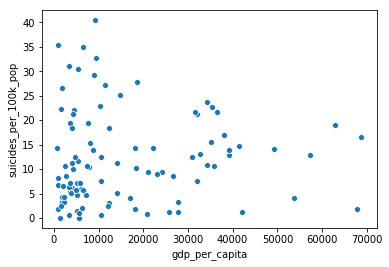

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = new_df, x = 'gdp_per_capita', y = 'suicides_per_100k_pop');

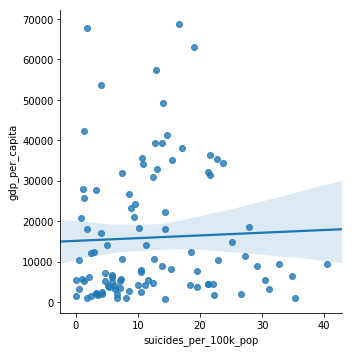

In [8]:
sns.lmplot(data = new_df, y = 'gdp_per_capita', x = 'suicides_per_100k_pop');

Gradient Descent approach for linear regression
***************

In [9]:
# source: https://anaconda.org/benawad/gradient-descent/notebook; https://www.youtube.com/watch?v=JsX0D92q1EI
# y = mx + b
m = 0
b = 0
y = lambda x : m*x + b

In [10]:
def plot_line(y, data_points, color='r'):
    x_values = [i for i in range(int(min(data_points))-1, int(max(data_points))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

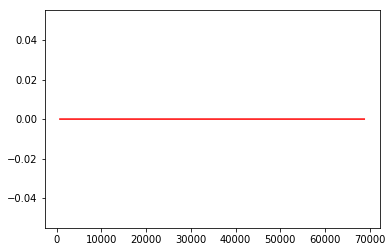

In [11]:
plot_line(y, new_df.gdp_per_capita)

Had to reverse x_points and y_points as the larger x values send the y values off chart to `inf` and the parameters to `nan`

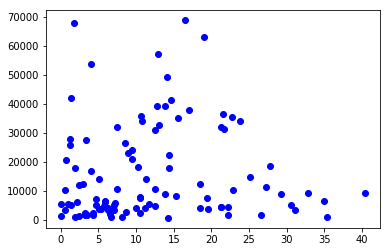

In [12]:
y_points = new_df.gdp_per_capita.tolist()
x_points = new_df.suicides_per_100k_pop.tolist()
plt.plot(x_points, y_points, 'bo')

gradient descent equations:

\begin{align}
 m & = m - \alpha \frac{1}{k} \sum_{i=1}^{k} (f(x^{i}) - y^{i}) \\  
 total1 & = \sum_{i=1}^{k} (f(x^{i}) - y^{i})
\end{align}
\begin{align}
b & = b - \alpha \frac{1}{k} \sum_{i=1}^{k} ((f(x^{i}) - y^{i}) * x^{i}) \\
total2 & = \sum_{i=1}^{k} ((f(x^{i}) - y^{i}) * x^{i})
\end{align}

$$\Theta_j = \Theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} [(h_\Theta (x_i) - y) x_i]$$


m =  197.3346811176384      b =  15.928198676574718
m =  348.9170423809676      b =  29.467282549350298
m =  465.3391421990914      b =  41.169867343154564
m =  554.7408915312822      b =  51.46063394013073
m =  623.3777459125013      b =  60.665946333510206


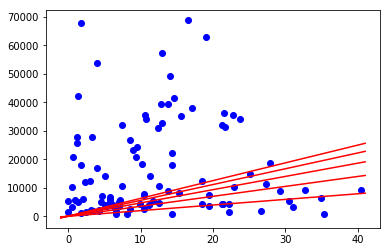

In [13]:
learn = .001 # .001, .01, .1, 1 ...
def summation(y, x_points, y_points):
    total1 = 0
    total2 = 0
    
    for i in range(0, len(x_points)):
        total1 += (y(x_points[i]) - y_points[i])
        total2 += (y(x_points[i]) - y_points[i]) * x_points[i]
        
    return total1 / len(x_points), total2 / len(x_points)


plt.plot(x_points, y_points, 'bo')
for i in range(5):
    s1, s2 = summation(y, x_points, y_points)
    m = m - learn * s2
    b = b - learn * s1
    print('m = ', m, '     b = ', b)
    plot_line(y, x_points)

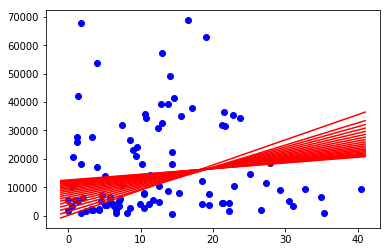

In [14]:
plt.plot(x_points, y_points, 'bo')
learn = 0.005 
for i in range(1000):
    s1, s2 = summation(y, x_points, y_points)
    m = m - learn * s2
    b = b - learn * s1
#     print('m = ', m, '     b = ', b)
    if (i%50==0): 
        plot_line(y, x_points)

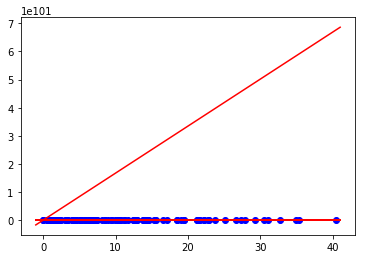

In [15]:
plt.plot(x_points, y_points, 'bo')
learn = 0.01 # too big, will not converge
for i in range(1000):
    s1, s2 = summation(y, x_points, y_points)
    m = m - learn * s2
    b = b - learn * s1
#     print('m = ', m, '     b = ', b)
    if (i%50==0): 
        plot_line(y, x_points)

Normal Equation approach
source: https://medium.com/@dikshitkathuria1803/normal-equation-using-python-5993454fbb41
****************
$\theta = (X^T X)^{-1} (X^T y)$

In [16]:
X = np.ones((len(x_points),1))
print(X.shape, pd.DataFrame(x_points).shape)
X = np.append(X,pd.DataFrame(x_points),axis=1)
print(X.shape)

(101, 1) (101, 1)
(101, 2)


In [17]:
x_transpose = np.transpose(X)   #calculating transpose
x_transpose_dot_x = x_transpose.dot(X)  # calculating dot product
temp_1 = np.linalg.inv(x_transpose_dot_x) #calculating inverse

temp_2 = x_transpose.dot(y_points)  

para = temp_1.dot(temp_2)
para

array([15122.42512263,    67.00150211])

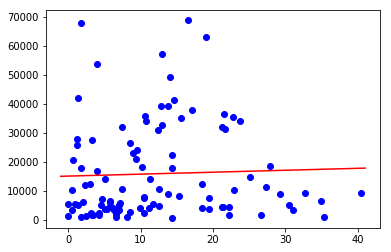

In [18]:
b, m = para
plt.plot(x_points, y_points, 'bo')
plot_line(y, x_points)